```cat CpG.filtered.coge_103.csv | tr "," "\\t" > CpG_103.cov```
```cat CpG.filtered.coge_104.csv | tr "," "\\t" > CpG_104.cov```
```cat CpG.filtered.coge_111.csv | tr "," "\\t" > CpG_111.cov```
```cat CpG.filtered.coge_113.csv | tr "," "\\t" > CpG_113.cov```
```cat CpG.filtered.coge_119.csv | tr "," "\\t" > CpG_119.cov```
```cat CpG.filtered.coge_120.csv | tr "," "\\t" > CpG_120.cov```
```cat CpG.filtered.coge_127.csv | tr "," "\\t" > CpG_127.cov```
```cat CpG.filtered.coge_128.csv | tr "," "\\t" > CpG_128.cov```
```cat CpG.filtered.coge_135.csv | tr "," "\\t" > CpG_135.cov```
```cat CpG.filtered.coge_136.csv | tr "," "\\t" > CpG_136.cov```
```cat CpG.filtered.coge_143.csv | tr "," "\\t" > CpG_143.cov```
```cat CpG.filtered.coge_145.csv | tr "," "\\t" > CpG_145.cov```

In [1]:
getwd()

[1] "/Users/hputnam/MyProjects/Geoduck_Epi/project_juvenile_geoduck_OA/Notebooks"

In [2]:
setwd('/Users/hputnam/MyProjects/Geoduck_Epi/project_juvenile_geoduck_OA/COGE_Bismark/CpG_cov')

In [3]:
getwd()

[1] "/Users/hputnam/MyProjects/Geoduck_Epi/project_juvenile_geoduck_OA/COGE_Bismark/CpG_cov"

In [4]:
install.packages("Rcpp")


The downloaded binary packages are in
	/var/folders/49/t6xmj4zs6jj9fpzpltfp6rcm0000gp/T//Rtmpw3Ej6W/downloaded_packages


In [5]:
library(Rcpp)

Warning message:
“package ‘Rcpp’ was built under R version 3.3.2”

In [6]:
source("http://bioconductor.org/biocLite.R")
biocLite(c("GenomicRanges","IRanges"))

Bioconductor version 3.3 (BiocInstaller 1.22.3), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.3 (BiocInstaller 1.22.3), R 3.3.1 (2016-06-21).
Installing package(s) ‘GenomicRanges’, ‘IRanges’



The downloaded binary packages are in
	/var/folders/49/t6xmj4zs6jj9fpzpltfp6rcm0000gp/T//Rtmpw3Ej6W/downloaded_packages


Old packages: 'BH', 'car', 'chron', 'coda', 'colorspace', 'curl',
  'estimability', 'fastcluster', 'ggplot2', 'ggthemes', 'git2r', 'Hmisc',
  'hms', 'jsonlite', 'lsmeans', 'oce', 'openssl', 'pbdZMQ', 'plotrix', 'repr',
  'rmarkdown', 'RSQLite', 'seacarb', 'selectr', 'survminer', 'zoo'


In [7]:
# install the development version from github
library(devtools)
install_github("al2na/methylKit", build_vignettes=FALSE, 
  repos=BiocInstaller::biocinstallRepos(),
  dependencies=TRUE)
library(methylKit)
library(graphics)

Skipping install of 'methylKit' from a github remote, the SHA1 (bf63a99c) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: GenomicRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tappl

In [8]:
file.list <- list('CpG_103.cov',
                  'CpG_104.cov',
                  'CpG_111.cov',
                  'CpG_113.cov',
                  'CpG_119.cov',
                  'CpG_120.cov',
                  'CpG_127.cov',
                  'CpG_128.cov',
                  'CpG_135.cov',
                  'CpG_136.cov',
                  'CpG_143.cov',
                  'CpG_145.cov') 

In [9]:
file.list

[[1]]
[1] "CpG_103.cov"

[[2]]
[1] "CpG_104.cov"

[[3]]
[1] "CpG_111.cov"

[[4]]
[1] "CpG_113.cov"

[[5]]
[1] "CpG_119.cov"

[[6]]
[1] "CpG_120.cov"

[[7]]
[1] "CpG_127.cov"

[[8]]
[1] "CpG_128.cov"

[[9]]
[1] "CpG_135.cov"

[[10]]
[1] "CpG_136.cov"

[[11]]
[1] "CpG_143.cov"

[[12]]
[1] "CpG_145.cov"

In [10]:
sample.info <- read.table("Sample.Info_Pool1.csv", header=T, sep=",")

In [11]:
sample.id <- list('EPI_103',
                  'EPI_104',
                  'EPI_111',
                  'EPI_113',
                  'EPI_119',
                  'EPI_120',
                  'EPI_127',
                  'EPI_128',
                  'EPI_135',
                  'EPI_136',
                  'EPI_143',
                  'EPI_145') 

In [12]:
sample.id

[[1]]
[1] "EPI_103"

[[2]]
[1] "EPI_104"

[[3]]
[1] "EPI_111"

[[4]]
[1] "EPI_113"

[[5]]
[1] "EPI_119"

[[6]]
[1] "EPI_120"

[[7]]
[1] "EPI_127"

[[8]]
[1] "EPI_128"

[[9]]
[1] "EPI_135"

[[10]]
[1] "EPI_136"

[[11]]
[1] "EPI_143"

[[12]]
[1] "EPI_145"

In [26]:
treatment <- c(1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2) 

In [27]:
treatment

[1] 1 1 2 2 0 0 1 1 0 0 2 2

In [28]:
myobj=methRead(file.list, sample.id, assembly="geoduck", treatment=treatment, mincov=1, pipeline='bismarkCoverage', context="CpG")

In [29]:
filtered.myobj <- filterByCoverage(myobj, lo.count = 3, lo.perc = NULL, hi.count = NULL, hi.perc = 95)

In [30]:
dim(filtered.myobj[[1]])

[1] 233317      7

In [31]:
head(filtered.myobj[[1]])

chr,start,end,strand,coverage,numCs,numTs
scaffold121673,6371,6371,*,7,0,7
scaffold121673,6559,6559,*,5,0,5
scaffold121673,6486,6486,*,8,0,8
scaffold121673,6355,6355,*,6,0,6
scaffold121673,5310,5310,*,7,0,7
scaffold121673,5682,5682,*,5,0,5


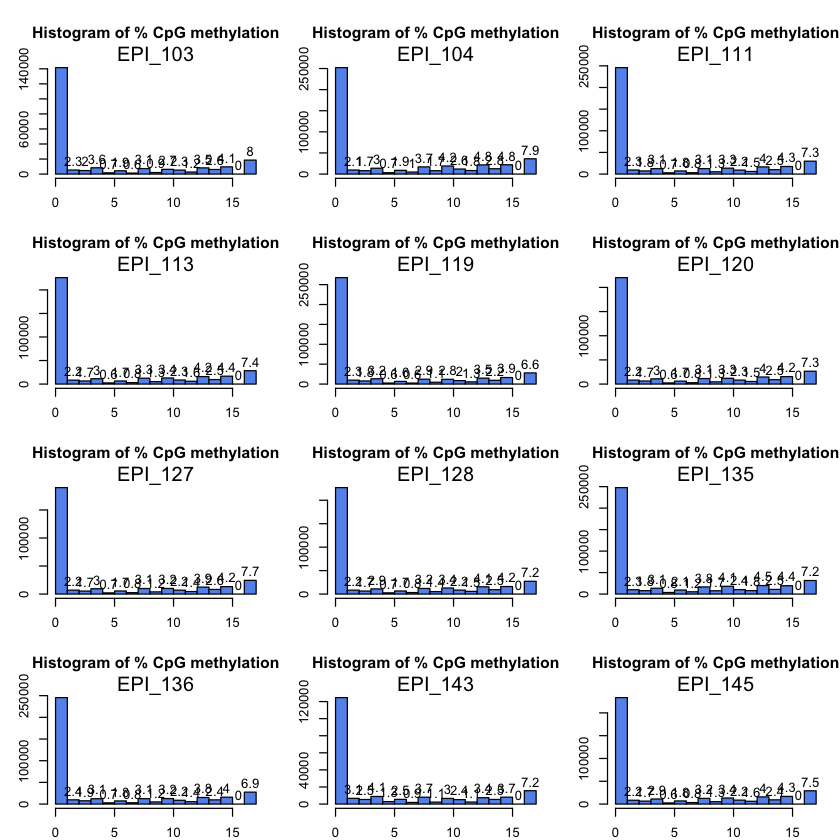

In [32]:
par(mfrow=c(4,3))
par(mar=c(2, 3, 4, 1))
getMethylationStats(filtered.myobj[[1]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[2]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[3]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[4]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[5]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[6]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[7]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[8]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[9]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[10]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[11]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[12]], plot = T, both.strands = F)

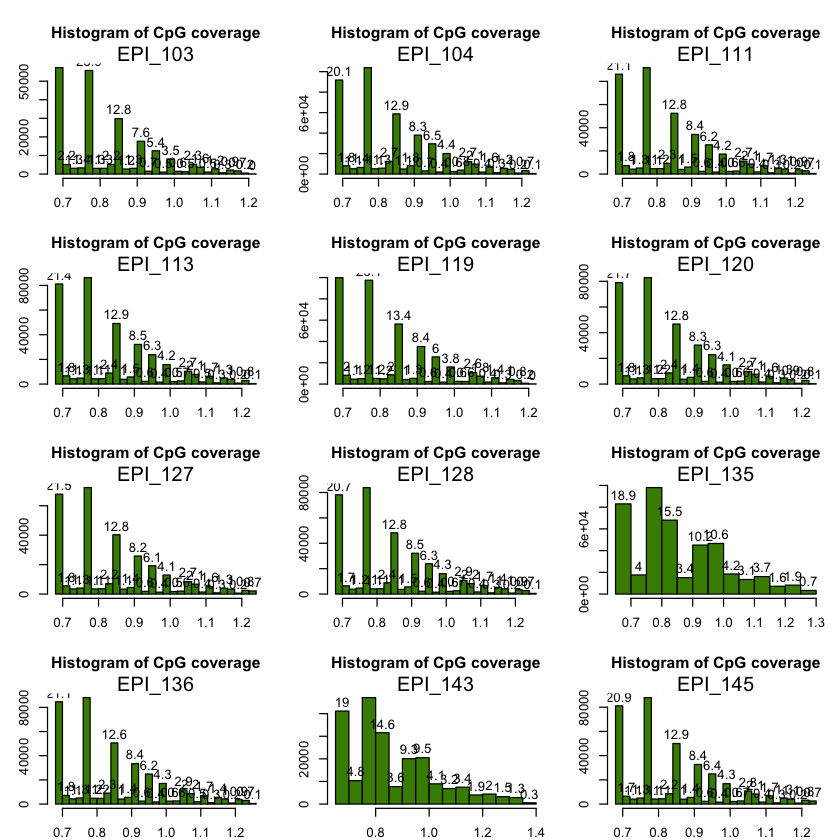

In [33]:
par(mfrow=c(4,3))
par(mar=c(2, 3, 4, 1))
getCoverageStats(filtered.myobj[[1]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[2]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[3]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[4]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[5]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[6]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[7]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[8]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[9]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[10]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[11]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[12]], plot = T, both.strands = F)

In [34]:
meth <- unite(filtered.myobj, destrand=F)

In [35]:
dim(meth)

[1] 8364   40

In [36]:
getCorrelation(meth, plot = F)

          EPI_103   EPI_104   EPI_111   EPI_113   EPI_119   EPI_120   EPI_127
EPI_103 1.0000000 0.8440688 0.8501215 0.8462242 0.8513984 0.8499534 0.8491295
EPI_104 0.8440688 1.0000000 0.8354675 0.8421814 0.8374957 0.8325205 0.8376720
EPI_111 0.8501215 0.8354675 1.0000000 0.8401932 0.8389974 0.8498955 0.8349053
EPI_113 0.8462242 0.8421814 0.8401932 1.0000000 0.8324247 0.8407349 0.8400008
EPI_119 0.8513984 0.8374957 0.8389974 0.8324247 1.0000000 0.8380277 0.8430809
EPI_120 0.8499534 0.8325205 0.8498955 0.8407349 0.8380277 1.0000000 0.8472825
EPI_127 0.8491295 0.8376720 0.8349053 0.8400008 0.8430809 0.8472825 1.0000000
EPI_128 0.8450758 0.8298491 0.8445405 0.8410774 0.8272152 0.8348095 0.8377176
EPI_135 0.8241375 0.8269099 0.8235197 0.8320423 0.8182507 0.8295948 0.8278297
EPI_136 0.8589562 0.8417831 0.8442324 0.8462885 0.8410405 0.8453542 0.8534222
EPI_143 0.8416678 0.8222005 0.8358141 0.8243071 0.8312353 0.8265075 0.8299115
EPI_145 0.8521134 0.8389933 0.8420953 0.8469614 0.8397333 0.8451

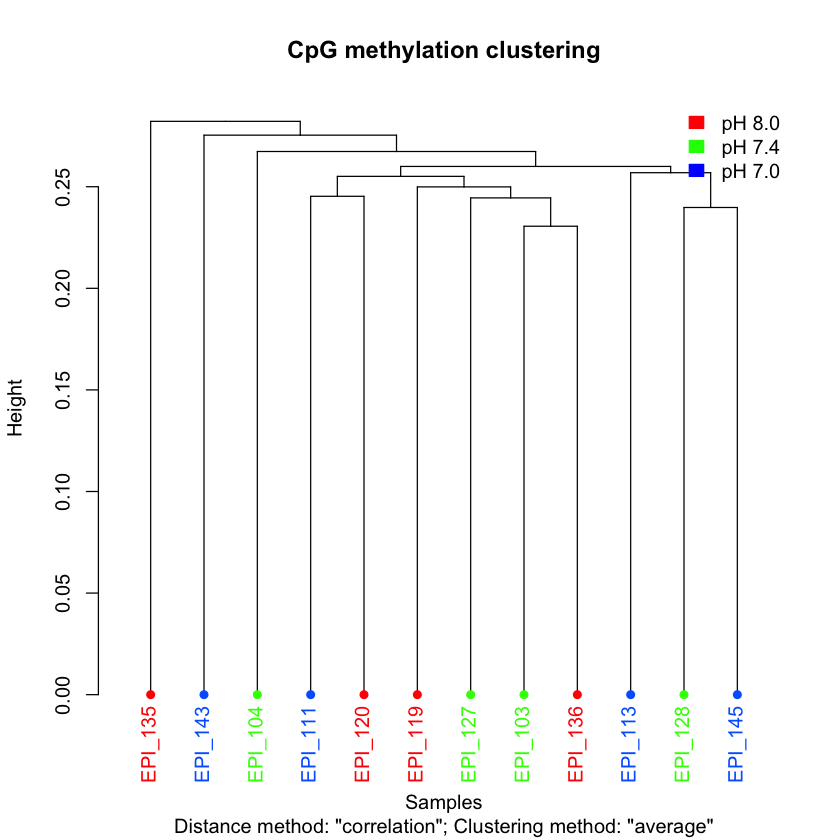

In [41]:
Clusters <- clusterSamples(meth, dist="correlation", method="average", plot=T)
cols <- c("red","green","blue")
legend("topright", legend = c("pH 8.0","pH 7.4", "pH 7.0"),
       fill = cols, border = cols, bty = "n")

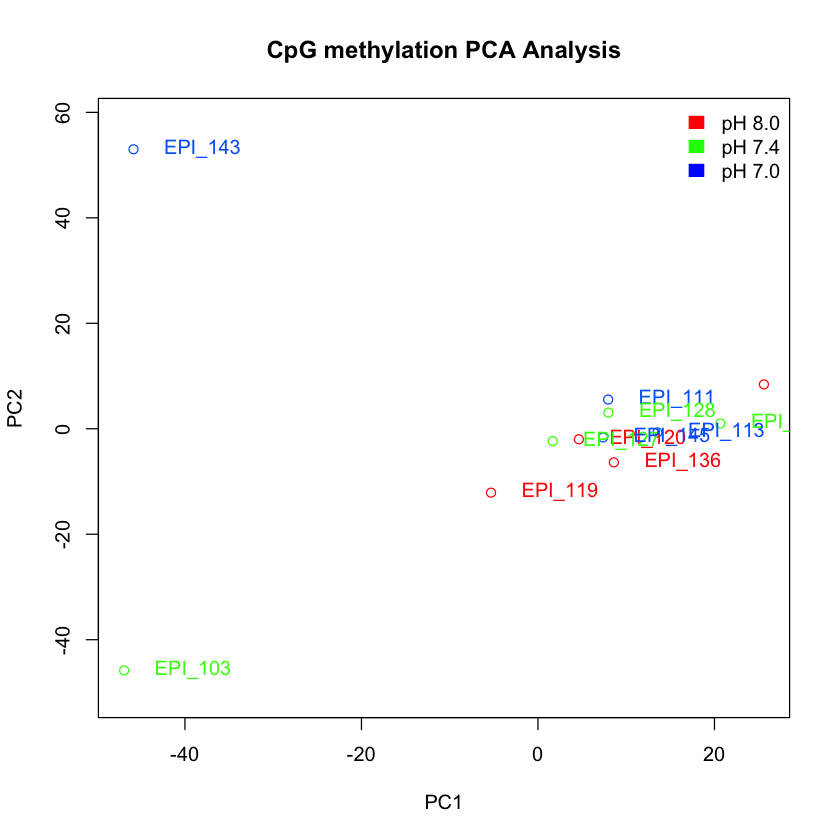

In [42]:
PCA <-PCASamples(meth, scale=T, center=T)
legend("topright", legend = c("pH 8.0","pH 7.4", "pH 7.0"),
       fill = cols, border = cols, bty = "n")